In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt

pd.options.display.max_columns = 107

# Getting started

In [2]:
df = pd.read_csv('../listings.csv')

print(df.shape)
df.head(2)

(11250, 106)


/Users/Samantha/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (43,61,62) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2265,https://www.airbnb.com/rooms/2265,20191112224534,2019-11-13,Zen-East in the Heart of Austin (monthly rental),Zen East is situated in a vibrant & diverse mu...,This colorful and clean 1923 house was complet...,Zen East is situated in a vibrant & diverse mu...,none,NaN,A 2013 Genuine Buddy Scooter 125 may be availa...,5 min walk to Capitol Metro Rail (train that t...,"Several local restaurants, small clubs, music ...","Depending on your dates and arrival time, I am...",• Check-in time is 4 pm. Check out is 11 am. I...,NaN,NaN,https://a0.muscache.com/im/pictures/4740524/63...,NaN,2466,https://www.airbnb.com/users/show/2466,Paddy,2008-08-23,"Austin, Texas, United States",I am a long time resident of Austin. I earned ...,within a few hours,100%,NaN,t,https://a0.muscache.com/im/users/2466/profile_...,https://a0.muscache.com/im/users/2466/profile_...,East Downtown,3.0,3.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,"Austin, TX, United States",East Downtown,78702,NaN,Austin,TX,78702,Austin,"Austin, TX",US,United States,30.27750,-97.71398,f,House,Entire home/apt,4,2.0,2.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",NaN,$225.00,NaN,NaN,$500.00,$100.00,4,$30.00,30,90,30,30,90,90,30.0,90.0,3 months ago,t,0,0,0,0,2019-11-13,24,1,2009-03-17,2019-03-16,93.0,9.0,10.0,10.0,10.0,8.0,9.0,f,NaN,"{""Texas State""}",f,f,strict_14_with_grace_period,f,f,3,2,1,0,0.18
1,5245,https://www.airbnb.com/rooms/5245,20191112224534,2019-11-13,"Eco friendly, Colorful, Clean, Cozy monthly share",Situated in a vibrant & diverse multicultural ...,"This green, colorful, clean and cozy house was...",Situated in a vibrant & diverse multicultural ...,none,NaN,Please note: A two story studio was built in t...,NaN,NaN,"I should be available, upon your arrival, to a...",A brief profile for all guests along with phot...,NaN,NaN,https://a0.muscache.com/im/pictures/5167505/b3...,NaN,2466,https://www.airbnb.com/users/show/2466,Paddy,2008-08-23,"Austin, Texas, United States",I am a long time resident of Austin. I earned ...,within a few hours,100%,NaN,t,https://a0.muscache.com/im/users/2466/profile_...,https://a0.muscache.com/im/users/2466/profile_...,East Downtown,3.0,3.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,"Aust

## Cut out the garbage

In [3]:
# first: scrap the URLs and ID numbers
url_id_columns = ['id', 'listing_url', 'scrape_id', 'thumbnail_url',
                  'medium_url', 'picture_url', 'xl_picture_url', 'host_id',
                  'host_url', 'host_thumbnail_url', 'host_picture_url']

df = df.drop(columns=url_id_columns)

print(df.shape)
df.head(2)

(11250, 95)


,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2019-11-13,Zen-East in the Heart of Austin (monthly rental),Zen East is situated in a vibrant & diverse mu...,This colorful and clean 1923 house was complet...,Zen East is situated in a vibrant & diverse mu...,none,NaN,A 2013 Genuine Buddy Scooter 125 may be availa...,5 min walk to Capitol Metro Rail (train that t...,"Several local restaurants, small clubs, music ...","Depending on your dates and arrival time, I am...",• Check-in time is 4 pm. Check out is 11 am. I...,Paddy,2008-08-23,"Austin, Texas, United States",I am a long time resident of Austin. I earned ...,within a few hours,100%,NaN,t,East Downtown,3.0,3.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,"Austin, TX, United States",East Downtown,78702,NaN,Austin,TX,78702,Austin,"Austin, TX",US,United States,30.27750,-97.71398,f,House,Entire home/apt,4,2.0,2.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",NaN,$225.00,NaN,NaN,$500.00,$100.00,4,$30.00,30,90,30,30,90,90,30.0,90.0,3 months ago,t,0,0,0,0,2019-11-13,24,1,2009-03-17,2019-03-16,93.0,9.0,10.0,10.0,10.0,8.0,9.0,f,NaN,"{""Texas State""}",f,f,strict_14_with_grace_period,f,f,3,2,1,0,0.18
1,2019-11-13,"Eco friendly, Colorful, Clean, Cozy monthly share",Situated in a vibrant & diverse multicultural ...,"This green, colorful, clean and cozy house was...",Situated in a vibrant & diverse multicultural ...,none,NaN,Please note: A two story studio was built in t...,NaN,NaN,"I should be available, upon your arrival, to a...",A brief profile for all guests along with phot...,Paddy,2008-08-23,"Austin, Texas, United States",I am a long time resident of Austin. I earned ...,within a few hours,100%,NaN,t,East Downtown,3.0,3.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,"Austin, TX, United States",East Downtown,78702,NaN,Austin,TX,78702,Austin,"Austin, TX",US,United States,30.27577,-97.71379,t,House,Private room,2,1.0,1.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",NaN,$100.00,NaN,NaN,$500.00,$75.00,2,$35.00,30,60,30,30,60,60,30.0,60.0,5 months ago,t,0,0,0,0,2019-11-13,9,0,2009-03-19,2018-03-14,91.0,10.0,8.0,10.0,9.0,10.0,9.0,f,NaN,"{""Texas State""}",f,f,strict_14_with_grace_period,f,f,3,2,1,0,0.07


In [4]:
# create a separate dataframe of text features for possible later analysis
# remove them from the main dataframe

text_columns = ['name', 'summary', 'space', 'description',
                'neighborhood_overview', 'notes', 'transit', 'access',
                'interaction', 'house_rules', 'host_name', 'host_about']

text_df = pd.DataFrame(data=df[text_columns])

df = df.drop(columns=text_columns)

text_df.head()

,name,summary,space,description,neighborhood_overview,notes,transit,access,interaction,house_rules,host_name,host_about
0,Zen-East in the Heart of Austin (monthly rental),Zen East is situated in a vibrant & diverse mu...,This colorful and clean 1923 house was complet...,Zen East is situated in a vibrant & diverse mu...,NaN,A 2013 Genuine Buddy Scooter 125 may be availa...,5 min walk to Capitol Metro Rail (train that t...,"Several local restaurants, small clubs, music ...","Depending on your dates and arrival time, I am...",• Check-in time is 4 pm. Check out is 11 am. I...,Paddy,I am a long time resident of Austin. I earned ...
1,"Eco friendly, Colorful, Clean, Cozy monthly share",Situated in a vibrant & diverse multicultural ...,"This green, colorful, clean and cozy house was...",Situated in a vibrant & diverse multicultural ...,NaN,Please note: A two story studio was built in t...,NaN,NaN,"I should be available, upon your arrival, to a...",A brief profile for all guests along with phot...,Paddy,I am a long time resident of Austin. I earned ...
2,"Walk to 6th, Rainey St and Convention Ctr",Great central location for walking to Convent...,Cute Private Studio apartment located in Willo...,Great central location for walking to Convent...,My neighborhood is ideally located if you want...,Parking on street requires a permit. Permits ...,"Bus stop around the block. Uber, Lyft, Ride, ...",Guests have access to patio.,I am happy to welcome my guests and show them in.,No Pets allowed. No smoking in the room. No m...,Sylvia,I am a licensed Real Estate Broker and owner o...
3,NW Austin Room,NaN,Looking for a comfortable inexpensive room to ...,Looking for a comfortable inexpensive room to ...,Quiet neighborhood with lots of trees and good...,NaN,We are approximately 16 miles from downtown Au...,Gravel Parking Kitchen,We interact with our guests as little or as mu...,I will need to see identification at check in....,Elizabeth,We're easygoing professionals that enjoy meeti...
4,Gem of a Studio near Downtown,"Great studio apartment, perfect for couples or...","(License #114332) Large, contemporary studio a...","Great studio apartment, perfect for couples or...",Travis Heights is one of the oldest neighborho...,Our calendar only extends a few months. If you...,"Parking for our place is on the street, roughl...",Private patio with lounge chairs and umbrella.,"You may see us during your stay, but you'll ma...",Posted prices include the 9% in local occupanc...,Todd,"We're a young family that likes to travel, we ..."


In [5]:
print(df.shape)
df.head()

(11250, 83)


,last_scraped,experiences_offered,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2019-11-13,none,2008-08-23,"Austin, Texas, United States",within a few hours,100%,NaN,t,East Downtown,3.0,3.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,"Austin, TX, United States",East Downtown,78702,NaN,Austin,TX,78702,Austin,"Austin, TX",US,United States,30.27750,-97.71398,f,House,Entire home/apt,4,2.0,2.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",NaN,$225.00,NaN,NaN,$500.00,$100.00,4,$30.00,30,90,30,30,90,90,30.0,90.0,3 months ago,t,0,0,0,0,2019-11-13,24,1,2009-03-17,2019-03-16,93.0,9.0,10.0,10.0,10.0,8.0,9.0,f,NaN,"{""Texas State""}",f,f,strict_14_with_grace_period,f,f,3,2,1,0,0.18
1,2019-11-13,none,2008-08-23,"Austin, Texas, United States",within a few hours,100%,NaN,t,East Downtown,3.0,3.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,"Austin, TX, United States",East Downtown,78702,NaN,Austin,TX,78702,Austin,"Austin, TX",US,United States,30.27577,-97.71379,t,House,Private room,2,1.0,1.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",NaN,$100.00,NaN,NaN,$500.00,$75.00,2,$35.00,30,60,30,30,60,60,30.0,60.0,5 months ago,t,0,0,0,0,2019-11-13,9,0,2009-03-19,2018-03-14,91.0,10.0,8.0,10.0,9.0,10.0,9.0,f,NaN,"{""Texas State""}",f,f,strict_14_with_grace_period,f,f,3,2,1,0,0.07
2,2019-11-13,none,2009-02-16,"Austin, Texas, United States",within a few hours,100%,NaN,t,East Downtown,1.0,1.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Austin, TX, United States",East Downtown,78702,NaN,Austin,TX,78702,Austin,"Austin, TX",US,United States,30.26112,-97.73448,t,Guesthouse,Entire home/apt,3,1.0,1.0,2.0,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Pets live...",NaN,$95.00,NaN,NaN,$100.00,NaN,2,$45.00,2,90,2,2,90,90,2.0,90.0,6 days ago,t,10,24,54,304,2019-11-13,508,47,2009-03-08,2019-10-28,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,"{""Texas State""}",f,f,strict_14_with_grace_period,f,t,1,1,0,0,3.90
3,2019-11-13,none,2009-02-19,"Austin, Texas, United States",within an hour,100%,NaN,t,SW Williamson Co.,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Austin, TX, United States",SW Williamson Co.,78729,NaN,Austin,TX,78729,Austin,"Austin, TX",US,United States,30.45596,-97.78370,t,House,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",NaN,$40.00,$160.00,NaN,NaN,NaN,2,$0.00,1,14,1,1,14,14,1.0,14.0,2 days ago,t,0,3,13,13,2019-11-13,257,19,2010-04-10,2019-11-03,98.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,"{""Texas State""}",f,f,moderate,t,t,1,0,1,0,2.20
4,2019-11-1

In [6]:
# drop no-variance columns -- all values the same

empty_columns = ['experiences_offered', 'host_acceptance_rate',
                 'neighbourhood_group_cleansed', 'state', 'market',
                 'country_code', 'country', 'jurisdiction_names']

df = df.drop(columns=empty_columns)

print(df.shape)
df.head()

(11250, 75)


,last_scraped,host_since,host_location,host_response_time,host_response_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,city,zipcode,smart_location,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2019-11-13,2008-08-23,"Austin, Texas, United States",within a few hours,100%,t,East Downtown,3.0,3.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,"Austin, TX, United States",East Downtown,78702,Austin,78702,"Austin, TX",30.27750,-97.71398,f,House,Entire home/apt,4,2.0,2.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",NaN,$225.00,NaN,NaN,$500.00,$100.00,4,$30.00,30,90,30,30,90,90,30.0,90.0,3 months ago,t,0,0,0,0,2019-11-13,24,1,2009-03-17,2019-03-16,93.0,9.0,10.0,10.0,10.0,8.0,9.0,f,NaN,f,f,strict_14_with_grace_period,f,f,3,2,1,0,0.18
1,2019-11-13,2008-08-23,"Austin, Texas, United States",within a few hours,100%,t,East Downtown,3.0,3.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,"Austin, TX, United States",East Downtown,78702,Austin,78702,"Austin, TX",30.27577,-97.71379,t,House,Private room,2,1.0,1.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",NaN,$100.00,NaN,NaN,$500.00,$75.00,2,$35.00,30,60,30,30,60,60,30.0,60.0,5 months ago,t,0,0,0,0,2019-11-13,9,0,2009-03-19,2018-03-14,91.0,10.0,8.0,10.0,9.0,10.0,9.0,f,NaN,f,f,strict_14_with_grace_period,f,f,3,2,1,0,0.07
2,2019-11-13,2009-02-16,"Austin, Texas, United States",within a few hours,100%,t,East Downtown,1.0,1.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Austin, TX, United States",East Downtown,78702,Austin,78702,"Austin, TX",30.26112,-97.73448,t,Guesthouse,Entire home/apt,3,1.0,1.0,2.0,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Pets live...",NaN,$95.00,NaN,NaN,$100.00,NaN,2,$45.00,2,90,2,2,90,90,2.0,90.0,6 days ago,t,10,24,54,304,2019-11-13,508,47,2009-03-08,2019-10-28,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,f,f,strict_14_with_grace_period,f,t,1,1,0,0,3.90
3,2019-11-13,2009-02-19,"Austin, Texas, United States",within an hour,100%,t,SW Williamson Co.,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Austin, TX, United States",SW Williamson Co.,78729,Austin,78729,"Austin, TX",30.45596,-97.78370,t,House,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",NaN,$40.00,$160.00,NaN,NaN,NaN,2,$0.00,1,14,1,1,14,14,1.0,14.0,2 days ago,t,0,3,13,13,2019-11-13,257,19,2010-04-10,2019-11-03,98.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,f,f,moderate,t,t,1,0,1,0,2.20
4,2019-11-13,2009-04-17,"Austin, Texas, United States",within an hour,100%,t,Travis Heights,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,f,"Austin, TX, United States",Travis Heights,78704,Austin,78704,"Austin, TX",30.24829,-97.73726,t,Guesthouse,Entire home/apt,2,1.0,NaN,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",550.0,$99.00,$700

## Clean the data

In [12]:
# 'relevant' here refers to actual use in the model -- expanding over time
relevant_cols = ['bedrooms', 'bathrooms', 'neighbourhood_cleansed']

df[relevant_cols].isnull().sum()

bedrooms                   5
bathrooms                 15
neighbourhood_cleansed     0
dtype: int64

In [16]:
# chosen cleaning method: replace nulls with medians from that column

for feature in relevant_cols:
    df[feature] = df[feature].fillna(value=df[feature].median())
    
df[relevant_cols].isnull().sum()

bedrooms                  0
bathrooms                 0
neighbourhood_cleansed    0
dtype: int64

In [ ]:
# target value, price, is stored as strings and has some 0 values

free_rentals = list(df[df['price'] == "$0.00"].index)

df = df.drop(index=free_rentals)

print(df.shape)

In [37]:
# convert to floats

df['price'] = df['price'].apply(lambda p: float(p.strip('$').replace(",",'')))

df['price'].describe()

count    11244.000000
mean       429.080398
std       1296.041387
min          1.000000
25%         80.000000
50%        140.000000
75%        300.000000
max      17999.000000
Name: price, dtype: float64

## Small Data Visualizations

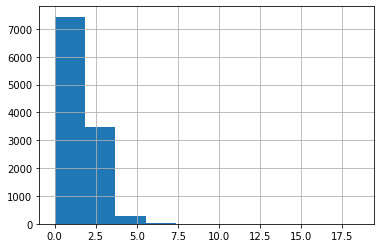

In [17]:
df['bathrooms'].hist();

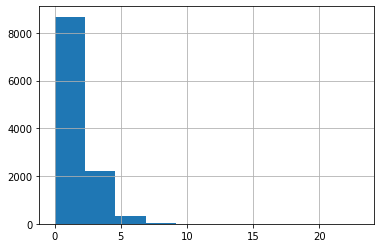

In [18]:
df['bedrooms'].hist();

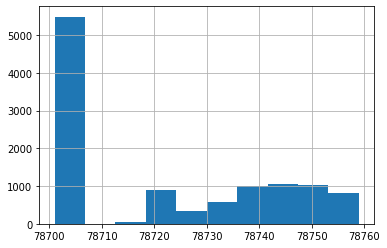

In [19]:
df['neighbourhood_cleansed'].hist();

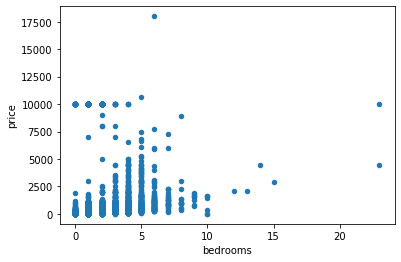

In [38]:
df.plot.scatter(x='bedrooms', y='price');

# Feature Engineering

## Extracting amenities

In [21]:
# amenities are currently saved as a string
# step one is to break it into a list of standard format

def am_to_list(amenities):
    li = amenities.split(",")

    for i in range(len(li)):
        li[i] = li[i].replace('"', '')
        li[i] = li[i].replace("'", '')
        li[i] = li[i].strip("{")
        li[i] = li[i].strip("}")

    return li

In [22]:
# create improved amenities column

df['am_list'] = df['amenities'].apply(am_to_list)

df.head()

,last_scraped,host_since,host_location,host_response_time,host_response_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,city,zipcode,smart_location,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,am_list
0,2019-11-13,2008-08-23,"Austin, Texas, United States",within a few hours,100%,t,East Downtown,3.0,3.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,"Austin, TX, United States",East Downtown,78702,Austin,78702,"Austin, TX",30.27750,-97.71398,f,House,Entire home/apt,4,2.0,2.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",NaN,$225.00,NaN,NaN,$500.00,$100.00,4,$30.00,30,90,30,30,90,90,30.0,90.0,3 months ago,t,0,0,0,0,2019-11-13,24,1,2009-03-17,2019-03-16,93.0,9.0,10.0,10.0,10.0,8.0,9.0,f,NaN,f,f,strict_14_with_grace_period,f,f,3,2,1,0,0.18,"[TV, Cable TV, Internet, Wifi, Air conditionin..."
1,2019-11-13,2008-08-23,"Austin, Texas, United States",within a few hours,100%,t,East Downtown,3.0,3.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,"Austin, TX, United States",East Downtown,78702,Austin,78702,"Austin, TX",30.27577,-97.71379,t,House,Private room,2,1.0,1.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",NaN,$100.00,NaN,NaN,$500.00,$75.00,2,$35.00,30,60,30,30,60,60,30.0,60.0,5 months ago,t,0,0,0,0,2019-11-13,9,0,2009-03-19,2018-03-14,91.0,10.0,8.0,10.0,9.0,10.0,9.0,f,NaN,f,f,strict_14_with_grace_period,f,f,3,2,1,0,0.07,"[TV, Cable TV, Internet, Wifi, Air conditionin..."
2,2019-11-13,2009-02-16,"Austin, Texas, United States",within a few hours,100%,t,East Downtown,1.0,1.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Austin, TX, United States",East Downtown,78702,Austin,78702,"Austin, TX",30.26112,-97.73448,t,Guesthouse,Entire home/apt,3,1.0,1.0,2.0,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Pets live...",NaN,$95.00,NaN,NaN,$100.00,NaN,2,$45.00,2,90,2,2,90,90,2.0,90.0,6 days ago,t,10,24,54,304,2019-11-13,508,47,2009-03-08,2019-10-28,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,f,f,strict_14_with_grace_period,f,t,1,1,0,0,3.90,"[TV, Wifi, Air conditioning, Kitchen, Pets liv..."
3,2019-11-13,2009-02-19,"Austin, Texas, United States",within an hour,100%,t,SW Williamson Co.,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Austin, TX, United States",SW Williamson Co.,78729,Austin,78729,"Austin, TX",30.45596,-97.78370,t,House,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",NaN,$40.00,$160.00,NaN,NaN,NaN,2,$0.00,1,14,1,1,14,14,1.0,14.0,2 days ago,t,0,3,13,13,2019-11-13,257,19,2010-04-10,2019-11-03,98.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,f,f,moderate,t,t,1,0,1,0,2.20,"[TV, Cable TV, Internet, Wifi, Air conditionin..."
4,2019-11-13,2009-04-17,"Austin, Texas, United States",within an hour,100%,t,Travis Heights,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,f,"A

In [23]:
# for reference, create a set of all possible amenities

superlist = []

for li in df['am_list']:
    superlist.extend(li)

all_ams = set(superlist)

all_ams

{'',
 ' toilet',
 '24-hour check-in',
 'Accessible-height bed',
 'Accessible-height toilet',
 'Air conditioning',
 'Air hockey table',
 'Air purifier',
 'Alfresco bathtub',
 'Amazon Echo',
 'BBQ grill',
 'Baby bath',
 'Baby monitor',
 'Babysitter recommendations',
 'Balcony',
 'Bar',
 'Basketball court',
 'Bath towel',
 'Bathroom essentials',
 'Bathtub',
 'Bathtub with bath chair',
 'Beach',
 'Beach chairs',
 'Beach essentials',
 'Beach volleyball',
 'Beachfront',
 'Bed linens',
 'Bedroom comforts',
 'Bidet',
 'Bocce ball court',
 'Body soap',
 'Breakfast',
 'Breakfast bar',
 'Breakfast table',
 'Brick oven',
 'Building staff',
 'Buzzer/wireless intercom',
 'Cable TV',
 'Carbon monoxide detector',
 'Cat(s)',
 'Ceiling fan',
 'Ceiling fans',
 'Central air conditioning',
 'Changing table',
 'Charcoal barbeque',
 'Children’s books and toys',
 'Children’s dinnerware',
 'Cleaning before checkout',
 'Coffee maker',
 'Convection oven',
 'Cooking basics',
 'Crib',
 'DVD player',
 'Day bed',
 '

In [41]:
# that's a lot, but we can just analyze the ones that seem potentially important

# new columns for whether each potential feature occurs in the list of amenities

potential_features = ['Air conditioning', 'Central air conditioning', 'Balcony',
                      'Dishwasher', 'Free parking on premises', 'Full kitchen',
                      'Kitchen', 'Kitchenette', 'Garden or backyard',
                      'Gated community', 'Internet', 'Wifi', 'Office',
                      'Smart Technology', 'Suitable for events']

for feature in potential_features:
    df[feature] = df['am_list'].apply(lambda li: feature in li)
    
df.head()

In [43]:
# do these features divide the data adequately?

for feature in potential_features:
    print(df[feature].value_counts(dropna=False))

True     11047
False      197
Name: Air conditioning, dtype: int64
False    11123
True       121
Name: Central air conditioning, dtype: int64
False    11172
True        72
Name: Balcony, dtype: int64
False    7008
True     4236
Name: Dishwasher, dtype: int64
True     9230
False    2014
Name: Free parking on premises, dtype: int64
False    10800
True       444
Name: Full kitchen, dtype: int64
True     10476
False      768
Name: Kitchen, dtype: int64
False    11201
True        43
Name: Kitchenette, dtype: int64
False    8565
True     2679
Name: Garden or backyard, dtype: int64
False    11243
True         1
Name: Gated community, dtype: int64
False    7698
True     3546
Name: Internet, dtype: int64
True     10875
False      369
Name: Wifi, dtype: int64
False    11235
True         9
Name: Office, dtype: int64
False    11243
True         1
Name: Smart Technology, dtype: int64
False    10035
True      1209
Name: Suitable for events, dtype: int64


In [ ]:
# lots to throw out

In [44]:
from scipy.stats import ttest_ind

In [50]:
df[df['Internet'] == True].head()

,last_scraped,host_since,host_location,host_response_time,host_response_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,city,zipcode,smart_location,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,am_list,Air conditioning,Central air conditioning,Balcony,Dishwasher,Free parking on premises,Full kitchen,Kitchen,Kitchenette,Garden or backyard,Gated community,Internet,Wifi,Office,Smart Technology,Suitable for events
0,2019-11-13,2008-08-23,"Austin, Texas, United States",within a few hours,100%,t,East Downtown,3.0,3.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,"Austin, TX, United States",East Downtown,78702,Austin,78702,"Austin, TX",30.27750,-97.71398,f,House,Entire home/apt,4,2.0,2.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",NaN,225.0,NaN,NaN,$500.00,$100.00,4,$30.00,30,90,30,30,90,90,30.0,90.0,3 months ago,t,0,0,0,0,2019-11-13,24,1,2009-03-17,2019-03-16,93.0,9.0,10.0,10.0,10.0,8.0,9.0,f,NaN,f,f,strict_14_with_grace_period,f,f,3,2,1,0,0.18,"[TV, Cable TV, Internet, Wifi, Air conditionin...",True,False,False,False,True,False,True,False,True,False,True,True,False,False,False
1,2019-11-13,2008-08-23,"Austin, Texas, United States",within a few hours,100%,t,East Downtown,3.0,3.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,"Austin, TX, United States",East Downtown,78702,Austin,78702,"Austin, TX",30.27577,-97.71379,t,House,Private room,2,1.0,1.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",NaN,100.0,NaN,NaN,$500.00,$75.00,2,$35.00,30,60,30,30,60,60,30.0,60.0,5 months ago,t,0,0,0,0,2019-11-13,9,0,2009-03-19,2018-03-14,91.0,10.0,8.0,10.0,9.0,10.0,9.0,f,NaN,f,f,strict_14_with_grace_period,f,f,3,2,1,0,0.07,"[TV, Cable TV, Internet, Wifi, Air conditionin...",True,False,False,False,True,False,True,False,False,False,True,True,False,False,False
3,2019-11-13,2009-02-19,"Austin, Texas, United States",within an hour,100%,t,SW Williamson Co.,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Austin, TX, United States",SW Williamson Co.,78729,Austin,78729,"Austin, TX",30.45596,-97.78370,t,House,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",NaN,40.0,$160.00,NaN,NaN,NaN,2,$0.00,1,14,1,1,14,14,1.0,14.0,2 days ago,t,0,3,13,13,2019-11-13,257,19,2010-04-10,2019-11-03,98.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,f,f,moderate,t,t,1,0,1,0,2.20,"[TV, Cable TV, Internet, Wifi, Air conditionin...",True,False,False,False,True,False,True,False,False,False,True,True,False,False,False
4,2019-11-13,2009-04-17,"Austin, Texas, United States",within an hour,100%,t,Travis Heights,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,f,"Austin, TX, United States",Travis Heights,78704,Austin,78704,"Austin, TX",30.24829,-97.73726,t,Guesthouse,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable T

## One hot encoding for room type

In [96]:
df['room_type'].value_counts(dropna=False)

Entire home/apt    8396
Private room       2586
Shared room         175
Hotel room           87
Name: room_type, dtype: int64

In [88]:
df['entire'] = df['room_type'] == 'Entire home/apt'
df['private'] = df['room_type'] == 'Private room'
df['shared'] = df['room_type'] == 'Shared room'
df['hotel'] = df['room_type'] == 'Hotel room'

df['hotel'].value_counts()

False    11157
True        87
Name: hotel, dtype: int64

## One hot encoding for neighborhood

In [99]:
df['neighbourhood'].value_counts(dropna=False)

East Downtown                 1002
NaN                            877
Downtown                       674
Travis Heights                 431
University of Texas            420
East Riverside                 358
Zilker                         337
Bouldin Creek                  333
Barton Hills                   291
South Lamar                    289
MLK & 183                      248
Cherry Creek                   230
South Congress                 204
Upper Boggy Creek              200
McKinney                       198
Old West Austin                194
North Loop                     194
Govalle                        178
Hancock                        165
West Congress                  160
West Campus                    155
Mueller                        153
Holly                          148
Hyde Park                      148
Westlake Hills                 140
Parker Lane                    137
Pleasant Valley                136
South Manchaca                 133
Brentwood           

In [132]:
# just for the exercise, let's only look at the top n neighborhoods
cutoff = 10
top_hoods = df['neighbourhood'].value_counts(dropna=True).index[:cutoff]

for hood in top_hoods:
    df[hood] = df['neighbourhood'] == hood
    
df.head()

,last_scraped,host_since,host_location,host_response_time,host_response_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,city,zipcode,smart_location,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,am_list,Air conditioning,Central air conditioning,Balcony,Dishwasher,Free parking on premises,Full kitchen,Kitchen,Kitchenette,Garden or backyard,Gated community,Internet,Wifi,Office,Smart Technology,Suitable for events,entire,private,shared,hotel,neighbor,East Downtown,Downtown,Travis Heights,University of Texas,East Riverside,Zilker,Bouldin Creek,Barton Hills,South Lamar,MLK & 183
0,2019-11-13,2008-08-23,"Austin, Texas, United States",within a few hours,100%,t,East Downtown,3.0,3.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,"Austin, TX, United States",East Downtown,78702,Austin,78702,"Austin, TX",30.27750,-97.71398,f,House,Entire home/apt,4,2.0,2.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",NaN,225.0,NaN,NaN,$500.00,$100.00,4,$30.00,30,90,30,30,90,90,30.0,90.0,3 months ago,t,0,0,0,0,2019-11-13,24,1,2009-03-17,2019-03-16,93.0,9.0,10.0,10.0,10.0,8.0,9.0,f,NaN,f,f,strict_14_with_grace_period,f,f,3,2,1,0,0.18,"[TV, Cable TV, Internet, Wifi, Air conditionin...",True,False,False,False,True,False,True,False,True,False,True,True,False,False,False,True,False,False,False,East Downtown,True,False,False,False,False,False,False,False,False,False
1,2019-11-13,2008-08-23,"Austin, Texas, United States",within a few hours,100%,t,East Downtown,3.0,3.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,"Austin, TX, United States",East Downtown,78702,Austin,78702,"Austin, TX",30.27577,-97.71379,t,House,Private room,2,1.0,1.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",NaN,100.0,NaN,NaN,$500.00,$75.00,2,$35.00,30,60,30,30,60,60,30.0,60.0,5 months ago,t,0,0,0,0,2019-11-13,9,0,2009-03-19,2018-03-14,91.0,10.0,8.0,10.0,9.0,10.0,9.0,f,NaN,f,f,strict_14_with_grace_period,f,f,3,2,1,0,0.07,"[TV, Cable TV, Internet, Wifi, Air conditionin...",True,False,False,False,True,False,True,False,False,False,True,True,False,False,False,False,True,False,False,East Downtown,True,False,False,False,False,False,False,False,False,False
2,2019-11-13,2009-02-16,"Austin, Texas, United States",within a few hours,100%,t,East Downtown,1.0,1.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Austin, TX, United States",East Downtown,78702,Austin,78702,"Austin, TX",30.26112,-97.73448,t,Guesthouse,Entire home/apt,3,1.0,1.0,2.0,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Pets live...",NaN,95.0,NaN,NaN,$100.00,NaN,2,$45.00,2,90,2,2,90,90,2.0,90.0,6 days ago,t,10,24,54,304,2019-11-13,508,47,2009-03-08,2019-10-28,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,f,f,strict_14_with_grace_period,f,t,1,1,0,0,3.90,"[TV, Wifi, Air conditioning, Kitchen, Pets liv...",True,False,False,False,False,

In [138]:
df['review_scores_rating'].describe()

count    8922.000000
mean       96.212284
std         6.761556
min        20.000000
25%        95.000000
50%        98.000000
75%       100.000000
max       100.000000
Name: review_scores_rating, dtype: float64

# Modeling

In [51]:
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor

In [141]:
# first, a basic kitchen sink model to check feature importance

features = ['bedrooms', 'bathrooms', 'neighbourhood_cleansed',
            'Free parking on premises', 'Dishwasher', 'Internet',
            'Garden or backyard', 'Suitable for events', 'Kitchen',
            'Air conditioning',
            'latitude', 'longitude',
            'entire', 'private', 'shared', 'hotel']

features.extend(top_hoods)

X = df[features]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8433, 26), (2811, 26), (8433,), (2811,))

In [142]:
forest = RandomForestRegressor(n_estimators=100)
forest.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [143]:
for i in range(len(forest.feature_importances_)):
    print(f'{features[i]}: {forest.feature_importances_[i]:.5f}')

bedrooms: 0.04827
bathrooms: 0.07899
neighbourhood_cleansed: 0.05568
Free parking on premises: 0.03714
Dishwasher: 0.02883
Internet: 0.01871
Garden or backyard: 0.02616
Suitable for events: 0.01136
Kitchen: 0.01145
Air conditioning: 0.00640
latitude: 0.32633
longitude: 0.30292
entire: 0.01818
private: 0.00488
shared: 0.00004
hotel: 0.00022
East Downtown: 0.00468
Downtown: 0.00218
Travis Heights: 0.00019
University of Texas: 0.00233
East Riverside: 0.01123
Zilker: 0.00090
Bouldin Creek: 0.00087
Barton Hills: 0.00096
South Lamar: 0.00005
MLK & 183: 0.00106


In [126]:
forest.score(X_test, y_test)

0.588855557290237

In [129]:
# slimmed-down model including only the features that reliably scored >.01

good_feats = ['bedrooms', 'bathrooms', 'neighbourhood_cleansed',
            'Free parking on premises', 'Dishwasher', 'Internet',
            'Garden or backyard', 'Suitable for events', 'Kitchen',
            'latitude', 'longitude',
            'entire']

X = df[good_feats]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8433, 12), (2811, 12), (8433,), (2811,))

In [130]:
forest = RandomForestRegressor(n_estimators=100)
forest.fit(X_train, y_train)

for i in range(len(forest.feature_importances_)):
    print(f'{features[i]}: {forest.feature_importances_[i]:.5f}')

bedrooms: 0.04427
bathrooms: 0.07746
neighbourhood_cleansed: 0.06258
Free parking on premises: 0.03418
Dishwasher: 0.03206
Internet: 0.02043
Garden or backyard: 0.02923
Suitable for events: 0.00965
Kitchen: 0.00945
Air conditioning: 0.34209
latitude: 0.31301
longitude: 0.02560


In [131]:
forest.score(X_test, y_test)

0.5258469829623788

In [149]:
top_hoods

Index(['East Downtown', 'Downtown', 'Travis Heights', 'University of Texas',
       'East Riverside', 'Zilker', 'Bouldin Creek', 'Barton Hills',
       'South Lamar', 'MLK & 183'],
      dtype='object')